# Examen 2

* Alumno: Antonio Miltos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargar el dataset desde la ruta local
df = pd.read_csv('c:\\Users\\anton\\OneDrive\\Desktop\\Documentos\\Examen modulo dos\\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Paso 1: Limpieza de datos
# Reemplazar ceros no plausibles con NaN en las columnas indicadas
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


La variable columns_with_zeros contiene una lista de las columnas del dataset en las que los valores de 0 no son plausibles desde un punto de vista lógico o médico. Estos ceros probablemente representan valores faltantes en lugar de datos válidos.

Por ejemplo, un valor de 0 en columnas como Glucose (nivel de glucosa) o BMI (Índice de Masa Corporal) no tiene sentido práctico, ya que ninguna persona puede tener un nivel de glucosa o un IMC de 0.

In [7]:
# Imputar valores faltantes utilizando la mediana
for column in columns_with_zeros:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ahora, los valores faltantes se rellenan con la mediana:

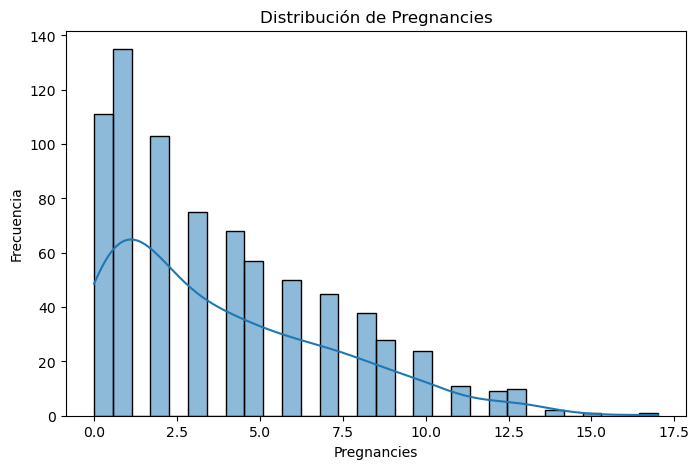

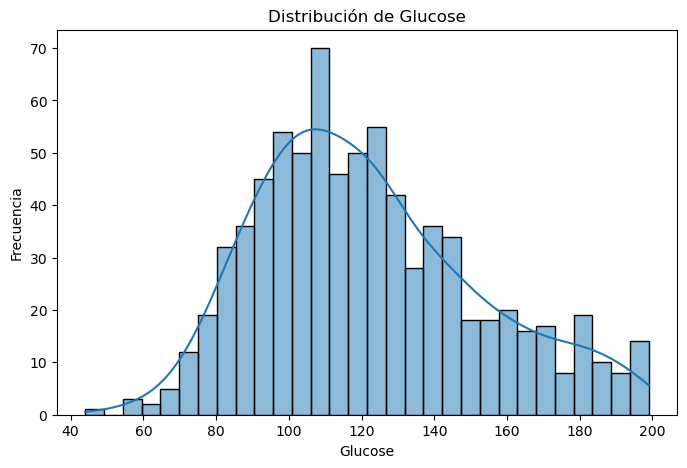

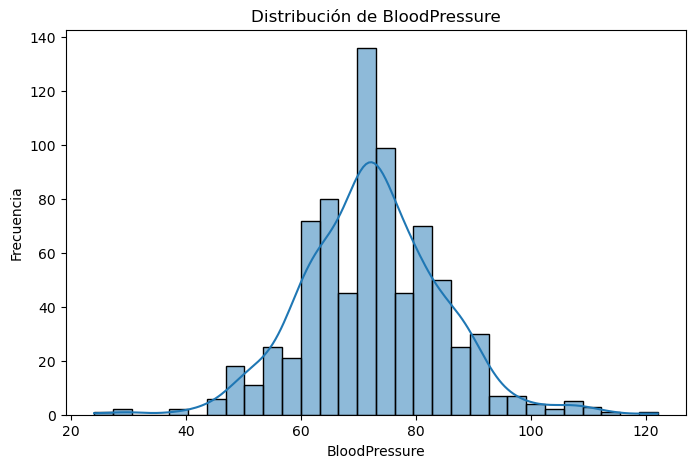

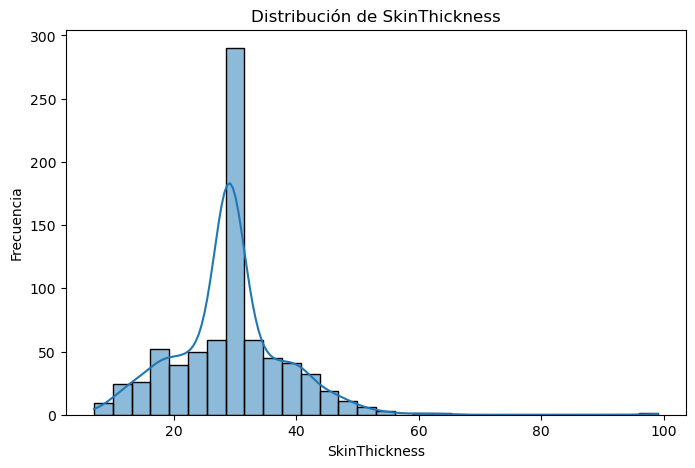

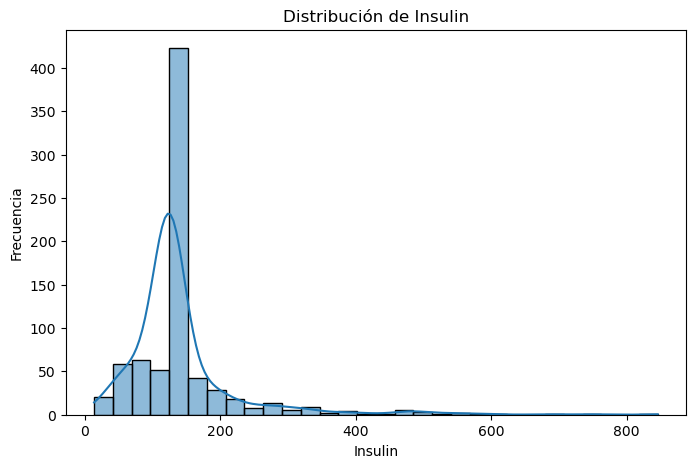

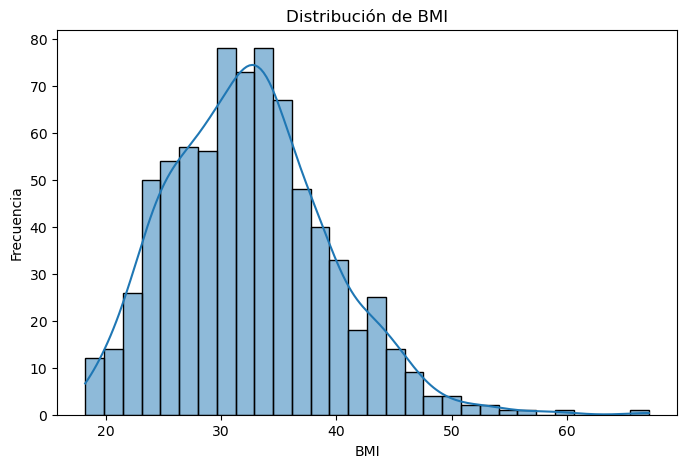

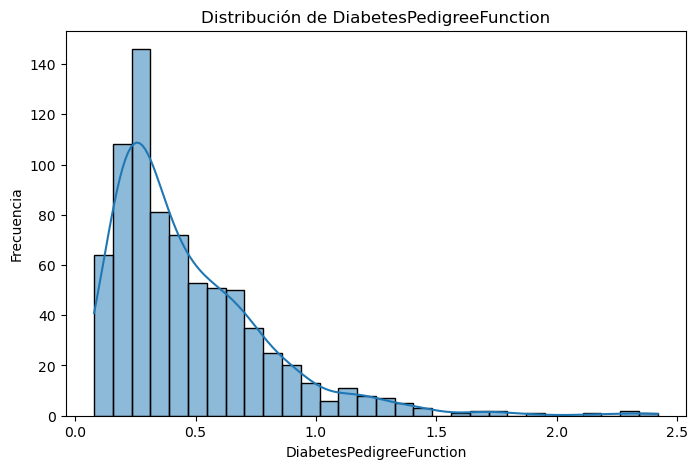

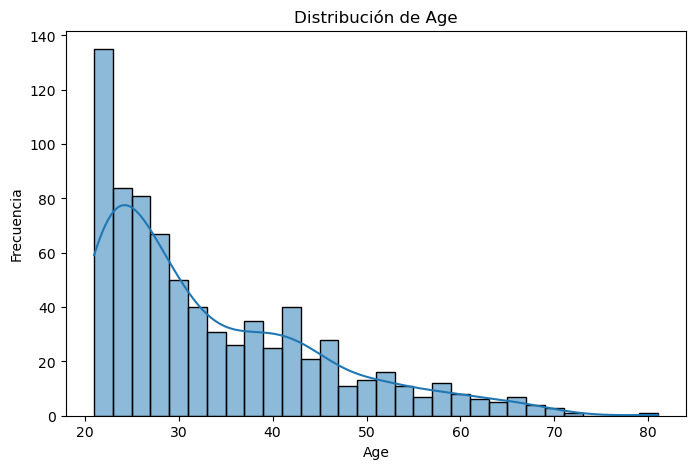

In [9]:
# Paso 2: Exploración de datos
# Visualización de distribuciones univariadas
for column in df.columns[:-1]: 
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

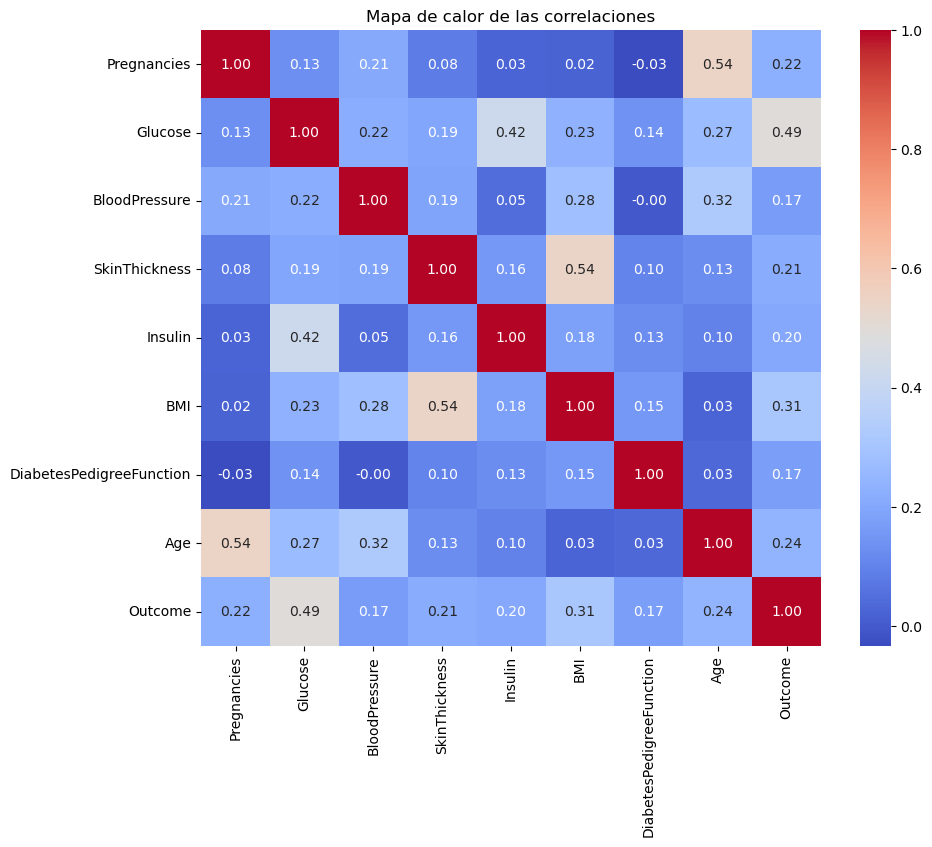

In [10]:
# Visualización de correlaciones mediante un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones')
plt.show()

In [11]:
# Paso 3: Modelos de clasificación
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Modelo 2: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [12]:
# Paso 4: Evaluación de los modelos
def evaluate_model(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

metrics_rf = evaluate_model(y_test, rf_predictions, rf_model.predict_proba(X_test)[:, 1])
metrics_xgb = evaluate_model(y_test, xgb_predictions, xgb_model.predict_proba(X_test)[:, 1])

# Mostrar los resultados en un DataFrame
results = pd.DataFrame({
    "Random Forest": metrics_rf,
    "XGBoost": metrics_xgb
}).T

print("Evaluación de Modelos de Clasificación:")
print(results)

Evaluación de Modelos de Clasificación:
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.740260   0.666667  0.518519  0.583333  0.815885
XGBoost        0.753247   0.666667  0.592593  0.627451  0.804856


En resumen, XGBoost se destaca como el modelo más robusto en términos de precisión, recall y F1-Score, lo que lo convierte en una mejor opción para aplicaciones donde la identificación correcta de instancias positivas es crucial. Sin embargo, Random Forest muestra un rendimiento competitivo en términos de ROC-AUC, lo que sugiere que podría ser preferido en situaciones donde se necesite un modelo más equilibrado en su rendimiento general.

Visualización de los resultados en un gráfico de barras 

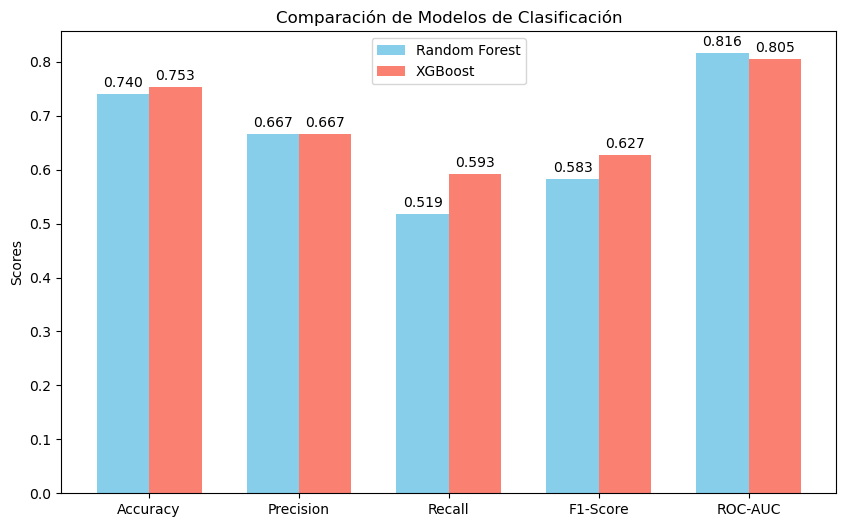

In [13]:
# Definición de las métricas y modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
random_forest_scores = [0.740260, 0.666667, 0.518519, 0.583333, 0.815885]
xgboost_scores = [0.753247, 0.666667, 0.592593, 0.627451, 0.804856]

# Configuración de la gráfica
x = np.arange(len(metrics))  # el rango de las métricas
width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Creación de las barras
bars1 = ax.bar(x - width/2, random_forest_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, xgboost_scores, width, label='XGBoost', color='salmon')

# Añadir etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Añadir etiquetas de los valores en las barras
def add_value_labels(bars):
    """Añade etiquetas de valor encima de las barras."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento en y
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

MODELOS CON IMPLEMENTACION DE BALANCEO DE CLASES CON SMOTE Y OPTIMIZACION DE HIPERPARAMETROS

In [14]:
# Separar características y variable objetivo
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Paso 2: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [15]:
# Paso 3: Optimización de hiperparámetros
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_grid_xgb, cv=5, scoring='recall')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

In [16]:
# Paso 4: Evaluación de los modelos
def evaluate_model(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

# Random Forest
rf_predictions = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]
metrics_rf = evaluate_model(y_test, rf_predictions, rf_proba)

# XGBoost Ajustado
xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

xgb_predictions = (xgb_proba >= optimal_threshold).astype(int)
metrics_xgb = evaluate_model(y_test, xgb_predictions, xgb_proba)

# Validación Cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=cv, scoring='recall')
xgb_cv_scores = cross_val_score(best_xgb_model, X, y, cv=cv, scoring='recall')


In [17]:
# Mostrar resultados
results = pd.DataFrame({
    "Random Forest": metrics_rf,
    "XGBoost": metrics_xgb
}).T

print("Evaluación de Modelos de Clasificación:")
print(results)

print("\nValidación Cruzada (Recall Promedio):")
print(f"Random Forest: {rf_cv_scores.mean():.4f}")
print(f"XGBoost: {xgb_cv_scores.mean():.4f}")

Evaluación de Modelos de Clasificación:
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.823333   0.790419  0.880000  0.832808  0.917067
XGBoost        0.840000   0.831169  0.853333  0.842105  0.899111

Validación Cruzada (Recall Promedio):
Random Forest: 0.5894
XGBoost: 0.6081



* Interpretación de los Resultados
Desempeño de los Modelos
* Random Forest:
Accuracy: 82.33% - Buen desempeño general.
Recall: 88.00% - Excelente para identificar casos positivos (diabetes).
F1-Score: 83.28% - Buen equilibrio entre precisión y recall.
ROC-AUC: 91.71% - Excelente capacidad de clasificación.
* XGBoost:
Accuracy: 84.00% - Mejor que Random Forest.
Recall: 85.33% - Ligeramente menor que Random Forest.
Precision: 83.12% - Mejora respecto a Random Forest.
F1-Score: 84.21% - El más alto, mostrando mejor equilibrio.
ROC-AUC: 89.91% - Alto, aunque menor que Random Forest.
* Validación Cruzada (Recall Promedio):
Random Forest: 58.94%
XGBoost: 60.81%
La validación cruzada indica que XGBoost tiene una mejor capacidad de generalización, lo que lo convierte en una mejor elección para datos no vistos.

Visualización de los resultados en un gráfico de barras

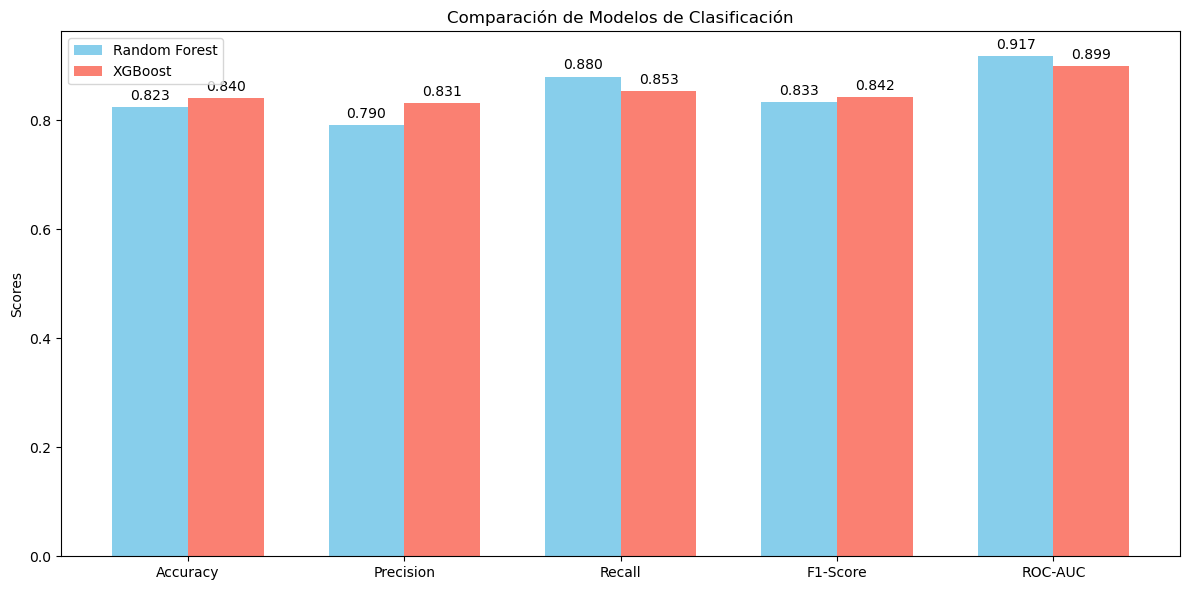

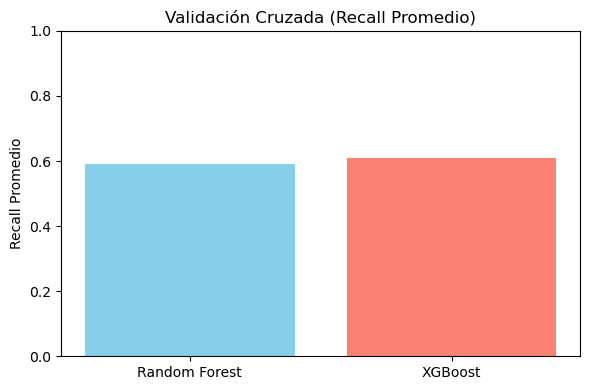

In [18]:
# Definición de las métricas y modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
random_forest_scores = [0.823333, 0.790419, 0.880000, 0.832808, 0.917067]
xgboost_scores = [0.840000, 0.831169, 0.853333, 0.842105, 0.899111]

# Validación Cruzada
cross_validation_metrics = ['Random Forest', 'XGBoost']
cross_validation_scores = [0.5894, 0.6081]

# Configuración de la gráfica para evaluación de modelos
x = np.arange(len(metrics)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para la evaluación de modelos
bars1 = ax.bar(x - width/2, random_forest_scores, width, label='Random Forest', color='skyblue')
bars2 = ax.bar(x + width/2, xgboost_scores, width, label='XGBoost', color='salmon')

# Añadir etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Añadir etiquetas de los valores en las barras
def add_value_labels(bars):
    """Añade etiquetas de valor encima de las barras."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Configuración de la gráfica para la validación cruzada
fig, ax2 = plt.subplots(figsize=(6, 4))

# Gráfico de barras para la validación cruzada
ax2.bar(cross_validation_metrics, cross_validation_scores, color=['skyblue', 'salmon'])

# Añadir etiquetas y título
ax2.set_ylabel('Recall Promedio')
ax2.set_title('Validación Cruzada (Recall Promedio)')
ax2.set_ylim(0, 1) 

# Añadir etiquetas de los valores en las barras
add_value_labels(ax2.patches)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

En resumen, XGBoost se destaca como el modelo más robusto en términos de Accuracy, Precision, y F1-Score, lo que lo convierte en una mejor opción para aplicaciones donde la identificación correcta de instancias positivas es crucial y donde se busca un buen equilibrio entre precisión y recuperación. Sin embargo, Random Forest muestra un rendimiento competitivo en Recall y ROC-AUC, lo que sugiere que podría ser preferido en situaciones donde la identificación de todas las instancias positivas es más crítica.